In [1]:
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot

import pandas as pd
import numpy as np
import datetime as dt
from collections import defaultdict
import time
import datetime as dt
from pytz import timezone
tz = timezone('EST')
from tqdm import tqdm

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
sns.set()

In [2]:
wcmass2011 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2011_smd_hourly.xls")
wcmass2011 = pd.read_excel(wcmass2011, 'WCMASS')
wcmass2012 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2012_smd_hourly.xls")
wcmass2012 = pd.read_excel(wcmass2012, 'WCMASS')
wcmass2013 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2013_smd_hourly.xls")
wcmass2013 = pd.read_excel(wcmass2013, 'WCMASS')
wcmass2014 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2014_smd_hourly.xls")
wcmass2014 = pd.read_excel(wcmass2014, 'WCMASS')
wcmass2015 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2015_smd_hourly.xls")
wcmass2015 = pd.read_excel(wcmass2015, 'WCMASS')
wcmass2016 = pd.ExcelFile(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2016_smd_hourly.xls")
wcmass2016 = pd.read_excel(wcmass2016, 'WCMA')

In [3]:
wcmass2017 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2017_smd_hourly.xlsx", 'WCMA')
wcmass2018 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2018_smd_hourly.xlsx", 'WCMA')
wcmass2019 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2019_smd_hourly.xlsx", 'WCMA')
wcmass2020 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2020_smd_hourly.xlsx", 'WCMA')
wcmass2021 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2021_smd_hourly.xlsx", 'WCMA')
wcmass2022 = pd.read_excel(r"C:\Users\Rohan\Desktop\Big Data\Load Data\smd_hourly_2011_2022\2022_smd_hourly.xlsx", 'WCMA')

In [4]:
wcmass2022

,Date,Hr_End,DA_Demand,RT_Demand,DA_LMP,DA_EC,DA_CC,DA_MLC,RT_LMP,RT_EC,RT_CC,RT_MLC,Dry_Bulb,Dew_Point
0,2022-01-01,1,1504.7,1464.508,32.14,32.35,-0.17,-0.04,25.89,25.95,0.0,-0.06,44,44
1,2022-01-01,2,1462.8,1403.776,32.02,32.31,-0.20,-0.09,25.80,25.87,0.0,-0.07,45,44
2,2022-01-01,3,1659.9,1354.681,30.72,30.85,0.00,-0.13,27.42,27.50,0.0,-0.08,44,44
3,2022-01-01,4,1644.5,1333.063,29.57,29.69,0.00,-0.12,25.05,25.13,0.0,-0.08,44,44
4,2022-01-01,5,1888.0,1328.553,30.75,30.86,0.00,-0.11,29.18,29.27,0.0,-0.09,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2022-01-31,20,2518.6,2493.067,227.64,226.40,0.00,1.24,296.58,295.80,0.0,0.78,21,3
740,2022-01-31,21,2417.4,2413.789,203.98,202.82,0.00,1.16,265.20,264.21,0.0,0.99,21,3
741,2022-01-31,22,2281.6,2302.601,184.42,183.42,0.00,1.00,253.11,251.93,0.0,1.18,12,4
742,2022-01-31,23,2178.1,2164.109,180.87,179.93,0.00,0.94,191.96,190.96,0.0,1.00,19,4


In [5]:
val2011 = wcmass2011['DEMAND']
val2012 = wcmass2012['DEMAND']
val2013 = wcmass2013['DEMAND']
val2014 = wcmass2014['DEMAND']
val2015 = wcmass2015['DEMAND']
val2016 = wcmass2016['RT_Demand']
val2017 = wcmass2017['RT_Demand']
val2018 = wcmass2018['RT_Demand']
val2019 = wcmass2019['RT_Demand']
val2020 = wcmass2020['RT_Demand']
val2021 = wcmass2021['RT_Demand']
val2022 = wcmass2022['RT_Demand']

In [6]:
values = [val2011, val2012, val2013, val2014, val2015, val2016, val2017, val2018, val2019, val2020, val2021, val2022]
values_df = pd.concat(values, axis=0, ignore_index=False)
values_df = values_df.reset_index()
period = len(values_df)

In [7]:
rng = pd.date_range('2011-01-01', periods=period, freq='1H')
date_df = pd.DataFrame({ 'ds': rng})
date_df = date_df.reset_index()

In [8]:
frames = [date_df, values_df]
wcmass_load = pd.concat(frames, axis=1, ignore_index=False)
wcmass_load = wcmass_load.rename(columns={wcmass_load.columns[1]: 'ds', wcmass_load.columns[3]: 'y'})
frames2 = [wcmass_load['ds'], wcmass_load['y']]
wcmass_load = pd.concat(frames2, axis=1, ignore_index=False)
wcmass_load

,ds,y
0,2011-01-01 00:00:00,1649.000
1,2011-01-01 01:00:00,1565.000
2,2011-01-01 02:00:00,1506.000
3,2011-01-01 03:00:00,1476.000
4,2011-01-01 04:00:00,1466.000
...,...,...
97171,2022-01-31 19:00:00,2493.067
97172,2022-01-31 20:00:00,2413.789
97173,2022-01-31 21:00:00,2302.601
97174,2022-01-31 22:00:00,2164.109


In [9]:
model = Prophet(
        changepoint_prior_scale=0.5, 
        seasonality_mode='multiplicative', 
        interval_width=0.95, 
    )
model.add_country_holidays(country_name='US')

In [10]:
model.fit(wcmass_load)

In [11]:
import json
from prophet.serialize import model_to_json, model_from_json

with open('wcmass_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model

# Forecasting

In [ ]:
with open('wcmass_model.json', 'r') as fin:
    m = model_from_json(json.load(fin))  # Load model

In [11]:
future_pd = m.make_future_dataframe(
        periods=365, 
        freq='D',
        include_history=False
    )
    
# make predictions
forecast_pd = m.predict(future_pd)

In [12]:
forecast_pd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97536,2022-02-16 00:00:00,1761.122629,1390.251276,2129.091105
97537,2022-02-16 01:00:00,1684.721337,1319.098654,2062.511536
97538,2022-02-16 02:00:00,1638.496032,1269.765555,2005.210705
97539,2022-02-16 03:00:00,1631.985403,1287.958402,1994.607378
97540,2022-02-16 04:00:00,1677.465528,1304.647857,2050.448628


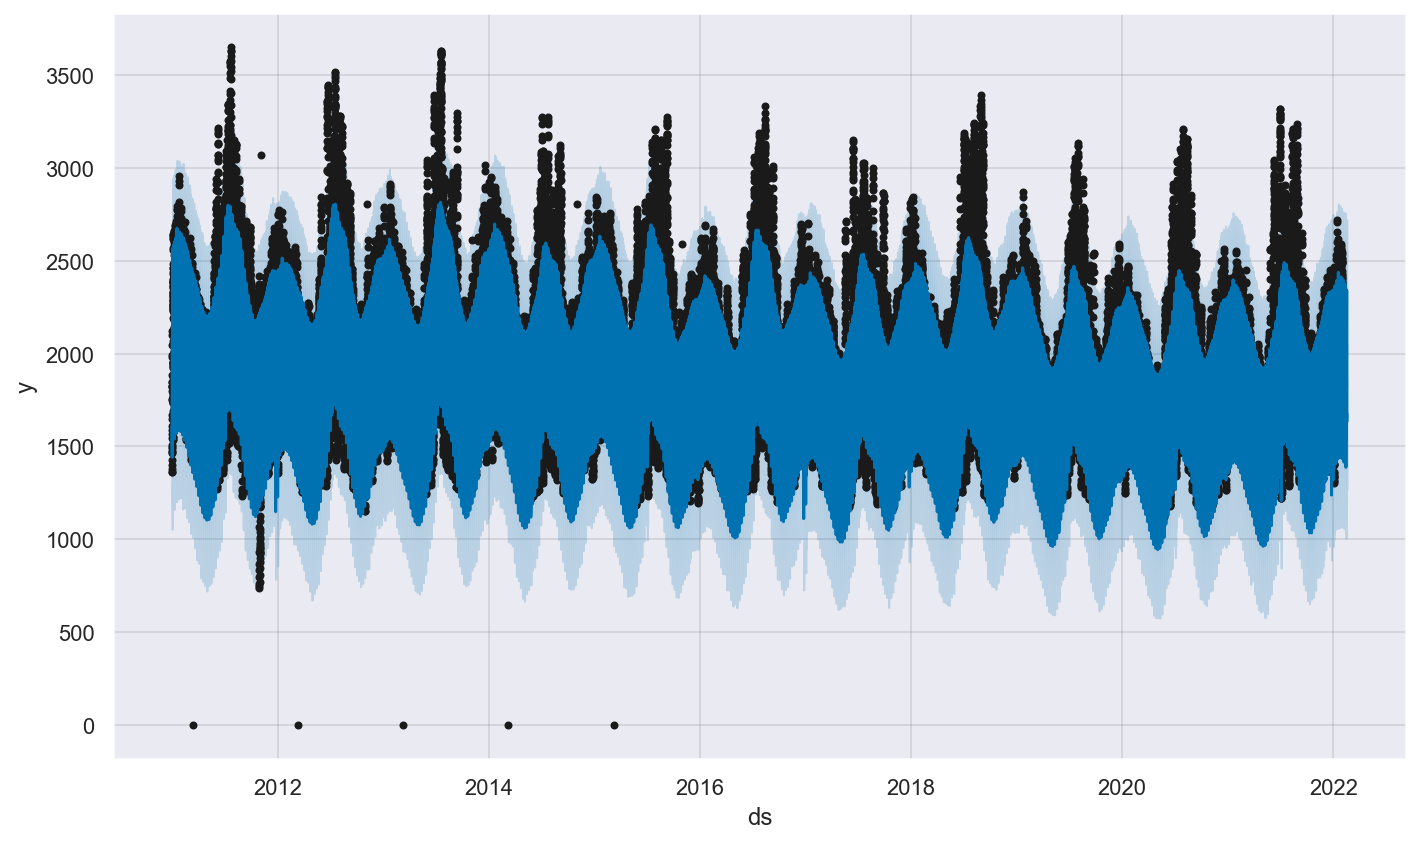

In [13]:
fig1 = model.plot(forecast_pd)

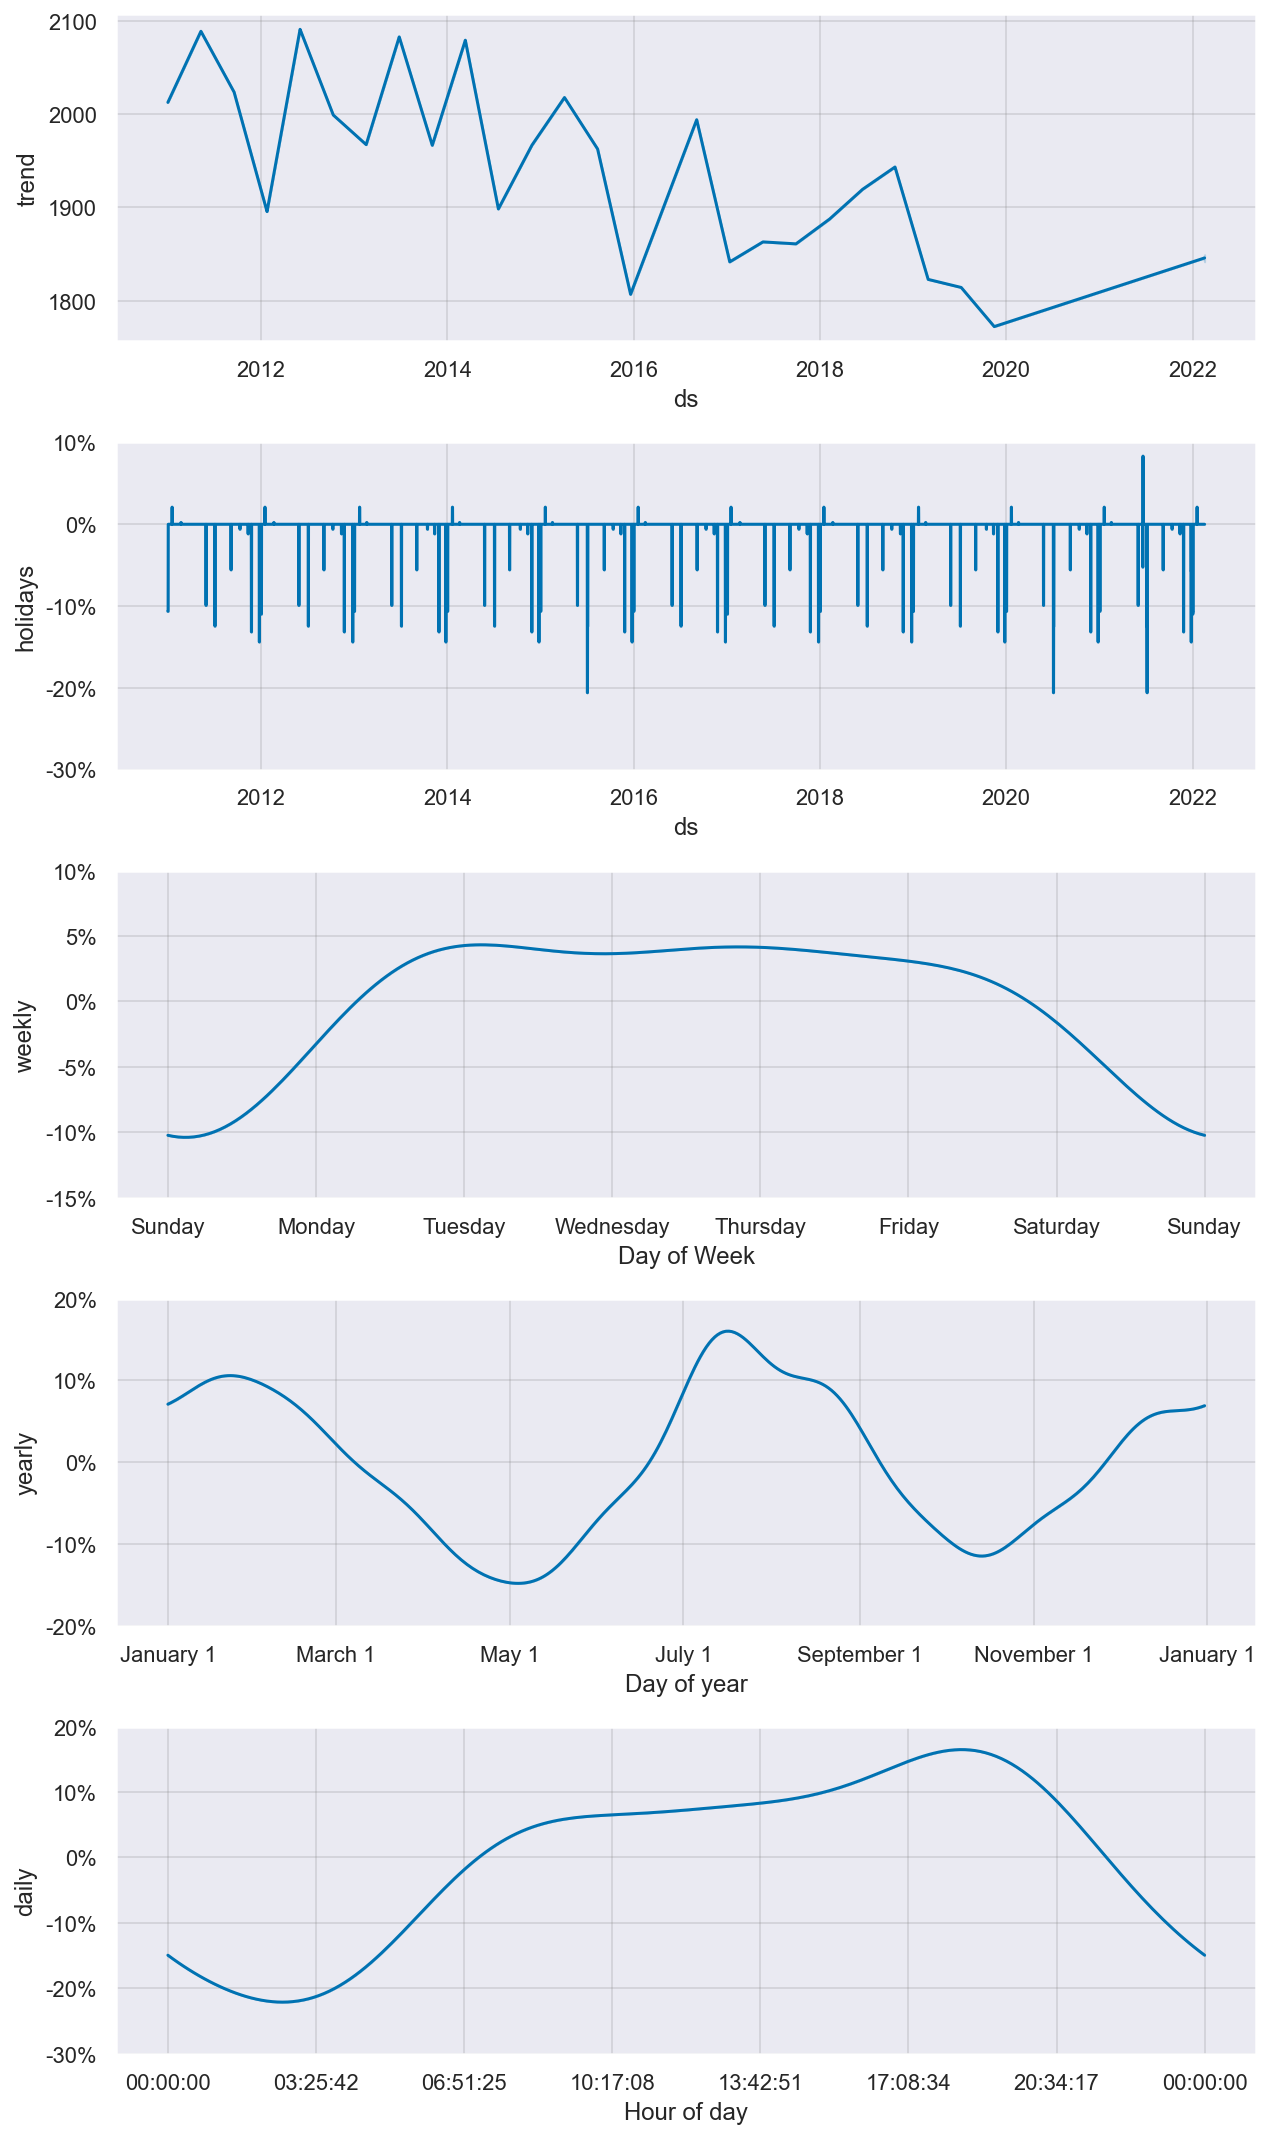

In [14]:
fig2 = model.plot_components(forecast_pd)

In [15]:
forecast_pd

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2011-01-01 00:00:00,2012.933189,1236.403366,1972.524810,2012.933189,2012.933189,0.0,0.0,0.0,0.0,...,-0.016079,-0.016079,-0.016079,0.070017,0.070017,0.070017,0.0,0.0,0.0,1606.028797
1,2011-01-01 01:00:00,2012.957770,1164.117737,1913.543263,2012.957770,2012.957770,0.0,0.0,0.0,0.0,...,-0.019999,-0.019999,-0.019999,0.070079,0.070079,0.070079,0.0,0.0,0.0,1514.975092
2,2011-01-01 02:00:00,2012.982351,1067.814610,1835.296039,2012.982351,2012.982351,0.0,0.0,0.0,0.0,...,-0.024050,-0.024050,-0.024050,0.070142,0.070142,0.070142,0.0,0.0,0.0,1456.459248
3,2011-01-01 03:00:00,2013.006932,1053.524393,1836.980635,2013.006932,2013.006932,0.0,0.0,0.0,0.0,...,-0.028214,-0.028214,-0.028214,0.070205,0.070205,0.070205,0.0,0.0,0.0,1440.926049
4,2011-01-01 04:00:00,2013.031513,1122.627421,1843.527527,2013.031513,2013.031513,0.0,0.0,0.0,0.0,...,-0.032476,-0.032476,-0.032476,0.070268,0.070268,0.070268,0.0,0.0,0.0,1481.811344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97536,2022-02-16 00:00:00,1845.756072,1390.251276,2129.091105,1841.738318,1849.147526,0.0,0.0,0.0,0.0,...,0.036453,0.036453,0.036453,0.067233,0.067233,0.067233,0.0,0.0,0.0,1761.122629
97537,2022-02-16 01:00:00,1845.759800,1319.098654,2062.511536,1841.694359,1849.213289,0.0,0.0,0.0,0.0,...,0.036563,0.036563,0.036563,0.067113,0.067113,0.067113,0.0,0.0,0.0,1684.721337
97538,2022-02-16 02:00:00,1845.763528,1269.765555,2005.210705,1841.659059,1849.234697,0.0,0.0,0.0,0.0,...,0.036728,0.036728,0.036728,0.066993,0.066993,0.066993,0.0,0.0,0.0,1638.496032
97539,2022-02-16 03:00:00,1845.767257,1287.958402,1994.607378,1841.648901,1849.253512,0.0,0.0,0.0,0.0,...,0.036943,0.036943,0.036943,0.066873,0.066873,0.066873,0.0,0.0,0.0,1631.985403


In [16]:
forecast_pd.to_csv('wcmass_forecast.csv', index=False)

In [17]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(model, 'wcmass_model.pkl')

['wcmass_model.pkl']